In [ ]:
# Load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import raw data (if using google drive files)
ADVERSEEVENTS = pd.read_csv ('/content/drive/MyDrive/Predicting Loss of Autonomy/Raw data/PRO-ACT/Aug 2022 ver./PROACT_ADVERSEEVENTS.csv')
ALSFRS = pd.read_csv ('/content/drive/MyDrive/Predicting Loss of Autonomy/Raw data/PRO-ACT/Aug 2022 ver./PROACT_ALSFRS.csv')
ALSHISTORY = pd.read_csv ('/content/drive/MyDrive/Predicting Loss of Autonomy/Raw data/PRO-ACT/Aug 2022 ver./PROACT_ALSHISTORY.csv')
CONMEDS = pd.read_csv ('/content/drive/MyDrive/Predicting Loss of Autonomy/Raw data/PRO-ACT/Aug 2022 ver./PROACT_CONMEDS.csv')
DEMOGRAPHICS = pd.read_csv ('/content/drive/MyDrive/Predicting Loss of Autonomy/Raw data/PRO-ACT/Aug 2022 ver./PROACT_DEMOGRAPHICS.csv')
ELESCORIAL = pd.read_csv ('/content/drive/MyDrive/Predicting Loss of Autonomy/Raw data/PRO-ACT/Aug 2022 ver./PROACT_ELESCORIAL.csv')
FAMILYHISTORY = pd.read_csv ('/content/drive/MyDrive/Predicting Loss of Autonomy/Raw data/PRO-ACT/Aug 2022 ver./PROACT_FAMILYHISTORY.csv')
FVC = pd.read_csv ('/content/drive/MyDrive/Predicting Loss of Autonomy/Raw data/PRO-ACT/Aug 2022 ver./PROACT_FVC.csv')
HANDGRIPSTRENGTH = pd.read_csv ('/content/drive/MyDrive/Predicting Loss of Autonomy/Raw data/PRO-ACT/Aug 2022 ver./PROACT_HANDGRIPSTRENGTH.csv')
RILUZOLE = pd.read_csv ('/content/drive/MyDrive/Predicting Loss of Autonomy/Raw data/PRO-ACT/Aug 2022 ver./PROACT_RILUZOLE.csv')
SVC = pd.read_csv ('/content/drive/MyDrive/Predicting Loss of Autonomy/Raw data/PRO-ACT/Aug 2022 ver./PROACT_SVC.csv')
TREATMENT = pd.read_csv ('/content/drive/MyDrive/Predicting Loss of Autonomy/Raw data/PRO-ACT/Aug 2022 ver./PROACT_TREATMENT.csv')
VITALSIGNS = pd.read_csv ('/content/drive/MyDrive/Predicting Loss of Autonomy/Raw data/PRO-ACT/Aug 2022 ver./PROACT_VITALSIGNS.csv')
LABS = pd.read_csv ('/content/drive/MyDrive/Predicting Loss of Autonomy/Raw data/PRO-ACT/Aug 2022 ver./PROACT_LABS.csv')

<ipython-input-3-03ce3d595d36>:3: DtypeWarning: Columns (18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  ALSFRS = pd.read_csv ('/content/drive/MyDrive/Predicting Loss of Autonomy/Raw data/PRO-ACT/Aug 2022 ver./PROACT_ALSFRS.csv')


#Create all forms data (including Age, Gender, Time from onset, Time from diagnosis, Onset region, ALSFRS, FVC, Creatinine, Weight) with format of : PatientID|datatype(form name)|feature name|feature value|delta

In [ ]:
DEMOGRAPHICS

,subject_id,Demographics_Delta,Age,Date_of_Birth,Ethnicity,Race_Americ_Indian_Alaska_Native,Race_Asian,Race_Black_African_American,Race_Hawaiian_Pacific_Islander,Race_Unknown,Race_Caucasian,Race_Other,Race_Other_Specify,Sex
0,89,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male
1,329,0.0,38.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,Female
2,348,0.0,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,Female
3,406,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male
4,411,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11670,22564,0.0,63.0,NaN,Non-Hispanic or Latino,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,Male
11671,160135,0.0,67.0,NaN,Non-Hispanic or Latino,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,Female
11672,304192,0.0,59.0,NaN,Non-Hispanic or Latino,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,Female
11673,820199,0.0,49.0,NaN,Non-Hispanic or Latino,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,Male


In [ ]:
RAW_Gender = DEMOGRAPHICS[DEMOGRAPHICS['Sex'].notnull()][['subject_id', 'Sex']]
RAW_Gender.columns = ['SubjectID', 'feature_value']
RAW_Gender['feature_value'] = RAW_Gender['feature_value'].replace({'Male': 'M', 'Female': 'F'})
RAW_Gender['feature_name'] = 'Gender'

RAW_Age_1 = DEMOGRAPHICS[DEMOGRAPHICS['Age'].notnull()][['subject_id', 'Age']]
RAW_Age_1.columns = ['SubjectID', 'feature_value']
RAW_Age_1['feature_name'] = 'Age'

# For those 'Age' values are NaN but 'Date of Birth' values exist, Age is calculated by (Date of Birth) // 365
RAW_Age_2 = DEMOGRAPHICS[DEMOGRAPHICS['Age'].isnull() & DEMOGRAPHICS['Date_of_Birth'].notnull()][['subject_id', 'Date_of_Birth']]
RAW_Age_2.columns = ['SubjectID', 'feature_value']
RAW_Age_2['feature_value'] = (-RAW_Age_2['feature_value']) // 365
RAW_Age_2['feature_name'] = 'Age'

RAW_Demographic = pd.concat([RAW_Gender, RAW_Age_1, RAW_Age_2])
RAW_Demographic['form_name'] = 'Demographic'
RAW_Demographic['feature_delta'] = 0
RAW_Demographic = RAW_Demographic[['SubjectID','form_name', 'feature_name','feature_value', 'feature_delta']]
RAW_Demographic

,SubjectID,form_name,feature_name,feature_value,feature_delta
0,89,Demographic,Gender,M,0
1,329,Demographic,Gender,F,0
2,348,Demographic,Gender,F,0
3,406,Demographic,Gender,M,0
4,411,Demographic,Gender,M,0
...,...,...,...,...,...
11100,991132,Demographic,Age,67.0,0
11125,992560,Demographic,Age,32.0,0
11126,992712,Demographic,Age,71.0,0
11130,993045,Demographic,Age,66.0,0


In [ ]:
ALSHISTORY

,subject_id,Site_of_Onset___Bulbar,Site_of_Onset___Limb,Site_of_Onset___Limb_and_Bulbar,Site_of_Onset___Other,Site_of_Onset___Other_Specify,Site_of_Onset___Spine,Subject_ALS_History_Delta,Disease_Duration,Symptom,Symptom_Other_Specify,Location,Location_Other_Specify,Site_of_Onset,Onset_Delta,Diagnosis_Delta
0,89,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,329,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,-1706.0,-1068.0
2,348,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,Onset: Other,-501.0,-302.0
3,406,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,411,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12931,22564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LOWER LIMB,NaN,Onset: Limb,-426.0,-67.0
12932,160135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BULBAR,NaN,Onset: Bulbar,-651.0,-125.0
12933,304192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LOWER LIMB,NaN,Onset: Limb,-838.0,-351.0
12934,820199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UPPER LIMB,NaN,Onset: Limb,-155.0,-35.0


In [ ]:
# Verify that there are no values of onset_site in following three columns
non_nan_count1 = ALSHISTORY['Site_of_Onset___Limb_and_Bulbar'].count()
print("Number of non-NaN values in Site_of_Onset___Limb_and_Bulbar:", non_nan_count1)

non_nan_count2 = ALSHISTORY['Site_of_Onset___Other_Specify'].count()
print("Number of non-NaN values in Site_of_Onset___Other_Specify:", non_nan_count2)

non_nan_count3 = ALSHISTORY['Site_of_Onset___Spine'].count()
print("Number of non-NaN values in Site_of_Onset___Spine:", non_nan_count3)


Number of non-NaN values in Site_of_Onset___Limb_and_Bulbar: 0
Number of non-NaN values in Site_of_Onset___Other_Specify: 0
Number of non-NaN values in Site_of_Onset___Spine: 0


In [ ]:
# Check how onset site data is written in three columns : 'Site_of_Onset___Bulbar', 'Site_of_Onset___Limb', 'Site_of_Onset'
mask0 = (ALSHISTORY[['Site_of_Onset___Bulbar', 'Site_of_Onset___Limb', 'Site_of_Onset']].count(axis=1) == 0)
rows_with_zero_non_null = mask0.sum()
print("Number of rows with only zero non-null value in specified columns:", rows_with_zero_non_null)

mask1 = (ALSHISTORY[['Site_of_Onset___Bulbar', 'Site_of_Onset___Limb', 'Site_of_Onset']].count(axis=1) == 1)
rows_with_one_non_null = mask1.sum()
print("Number of rows with only one non-null value in specified columns:", rows_with_one_non_null)

mask2 = (ALSHISTORY[['Site_of_Onset___Bulbar', 'Site_of_Onset___Limb', 'Site_of_Onset']].count(axis=1) == 2)
rows_with_two_non_null = mask2.sum()
print("Number of rows with only two non-null value in specified columns:", rows_with_two_non_null)

mask3 = (ALSHISTORY[['Site_of_Onset___Bulbar', 'Site_of_Onset___Limb', 'Site_of_Onset']].count(axis=1) == 3)
rows_with_three_non_null = mask3.sum()
print("Number of rows with only three non-null value in specified columns:", rows_with_three_non_null)

Number of rows with only zero non-null value in specified columns: 2668
Number of rows with only one non-null value in specified columns: 10133
Number of rows with only two non-null value in specified columns: 135
Number of rows with only three non-null value in specified columns: 0


In [ ]:
# Check rows with only two non-null value in specified columns
ALSHISTORY[['Site_of_Onset___Bulbar', 'Site_of_Onset___Limb', 'Site_of_Onset']][mask2]

,Site_of_Onset___Bulbar,Site_of_Onset___Limb,Site_of_Onset
11,0.0,1.0,NaN
75,0.0,1.0,NaN
82,1.0,1.0,NaN
85,1.0,1.0,NaN
116,0.0,1.0,NaN
...,...,...,...
11883,0.0,1.0,NaN
12259,1.0,1.0,NaN
12277,1.0,1.0,NaN
12438,0.0,1.0,NaN


In [ ]:
# Extract rows that have onset site information in column 'Site_of_Onset'
RAW_onset_site1 = ALSHISTORY[ALSHISTORY['Site_of_Onset'].notnull()][['subject_id', 'Site_of_Onset']]
replacement_dict = {'Onset: Other': 'Other',
    'Onset: Bulbar': 'Bulbar',
    'Onset: Limb': 'Limb',
    'Onset: Spine': 'Spine',
    'Onset: Limb and Bulbar': 'Limb and Bulbar'}

RAW_onset_site1['Site_of_Onset'] = RAW_onset_site1['Site_of_Onset'].replace(replacement_dict)

# Extract rows that have onset site information in column 'Site_of_Onset___Bulbar' & 'Site_of_Onset___Limb'
RAW_onset_site2 = ALSHISTORY[(ALSHISTORY['Site_of_Onset___Bulbar'] == 1) & ((ALSHISTORY['Site_of_Onset___Limb'] == 0) | (ALSHISTORY['Site_of_Onset___Limb'].isnull()))][['subject_id']]
RAW_onset_site2['Site_of_Onset'] = 'Bulbar'

RAW_onset_site3 = ALSHISTORY[(ALSHISTORY['Site_of_Onset___Limb'] == 1) & ((ALSHISTORY['Site_of_Onset___Bulbar'] == 0) | (ALSHISTORY['Site_of_Onset___Bulbar'].isnull()))][['subject_id']]
RAW_onset_site3['Site_of_Onset'] = 'Limb'

RAW_onset_site4 = ALSHISTORY[(ALSHISTORY['Site_of_Onset___Bulbar'] == 1) & (ALSHISTORY['Site_of_Onset___Limb'] == 1)][['subject_id']]
RAW_onset_site4['Site_of_Onset'] = 'Limb and Bulbar'

In [ ]:
RAW_onset_site = pd.concat([RAW_onset_site1, RAW_onset_site2, RAW_onset_site3, RAW_onset_site4]).sort_values(by='subject_id', axis=0)
RAW_onset_site.columns = ['SubjectID', 'feature_value']
RAW_onset_site['feature_name'] = 'onset_site'

RAW_onset_delta = ALSHISTORY[ALSHISTORY['Onset_Delta'].notnull()][['subject_id', 'Onset_Delta']]
RAW_onset_delta.columns = ['SubjectID', 'feature_value']
RAW_onset_delta['feature_name'] = 'onset_delta'

RAW_diag_delta = ALSHISTORY[ALSHISTORY['Diagnosis_Delta'].notnull()][['subject_id', 'Diagnosis_Delta']]
RAW_diag_delta.columns = ['SubjectID', 'feature_value']
RAW_diag_delta['feature_name'] = 'diag_delta'

RAW_ALSHX = pd.concat([RAW_onset_site, RAW_onset_delta, RAW_diag_delta])
RAW_ALSHX['form_name'] = 'ALSHX'
RAW_ALSHX['feature_delta'] = 0
RAW_ALSHX = RAW_ALSHX[['SubjectID','form_name', 'feature_name','feature_value', 'feature_delta']]
RAW_ALSHX

,SubjectID,form_name,feature_name,feature_value,feature_delta
0,89,ALSHX,onset_site,Limb,0
1,329,ALSHX,onset_site,Limb,0
2,348,ALSHX,onset_site,Other,0
3,406,ALSHX,onset_site,Limb,0
4,411,ALSHX,onset_site,Bulbar,0
...,...,...,...,...,...
12931,22564,ALSHX,diag_delta,-67.0,0
12932,160135,ALSHX,diag_delta,-125.0,0
12933,304192,ALSHX,diag_delta,-351.0,0
12934,820199,ALSHX,diag_delta,-35.0,0


In [ ]:
ALSFRS

,subject_id,Q1_Speech,Q2_Salivation,Q3_Swallowing,Q4_Handwriting,Q5a_Cutting_without_Gastrostomy,Q5b_Cutting_with_Gastrostomy,Q6_Dressing_and_Hygiene,Q7_Turning_in_Bed,Q8_Walking,Q9_Climbing_Stairs,Q10_Respiratory,ALSFRS_Delta,ALSFRS_Total,ALSFRS_R_Total,R_1_Dyspnea,R_2_Orthopnea,R_3_Respiratory_Insufficiency,Mode_of_Administration,ALSFRS_Responded_By
0,329,4.0,3.0,4.0,3.0,2.0,NaN,3.0,2.0,2.0,1.0,3.0,0.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN
1,329,4.0,3.0,4.0,3.0,3.0,NaN,3.0,3.0,2.0,1.0,4.0,42.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN
2,329,3.0,3.0,4.0,3.0,4.0,NaN,3.0,4.0,2.0,2.0,4.0,106.0,32.0,NaN,NaN,NaN,NaN,NaN,NaN
3,329,4.0,2.0,4.0,3.0,1.0,NaN,3.0,3.0,2.0,1.0,3.0,247.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN
4,329,4.0,3.0,4.0,3.0,2.0,NaN,3.0,4.0,2.0,2.0,3.0,72.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67607,587563,2.0,1.0,2.0,4.0,4.0,NaN,4.0,4.0,3.0,1.0,NaN,71.0,NaN,35.0,2.0,4.0,4.0,NaN,NaN
67608,587563,2.0,1.0,2.0,4.0,4.0,NaN,4.0,4.0,3.0,1.0,NaN,49.0,NaN,36.0,3.0,4.0,4.0,NaN,NaN
67609,587563,2.0,2.0,2.0,4.0,4.0,NaN,4.0,4.0,3.0,4.0,NaN,29.0,NaN,41.0,4.0,4.0,4.0,NaN,NaN
67610,587563,2.0,1.0,2.0,4.0,4.0,NaN,4.0,4.0,3.0,3.0,NaN,15.0,NaN,38.0,3.0,4.0,4.0,NaN,NaN


In [ ]:
ALSFRS.columns

Index(['subject_id', 'Q1_Speech', 'Q2_Salivation', 'Q3_Swallowing',
       'Q4_Handwriting', 'Q5a_Cutting_without_Gastrostomy',
       'Q5b_Cutting_with_Gastrostomy', 'Q6_Dressing_and_Hygiene',
       'Q7_Turning_in_Bed', 'Q8_Walking', 'Q9_Climbing_Stairs',
       'Q10_Respiratory', 'ALSFRS_Delta', 'ALSFRS_Total', 'ALSFRS_R_Total',
       'R_1_Dyspnea', 'R_2_Orthopnea', 'R_3_Respiratory_Insufficiency',
       'Mode_of_Administration', 'ALSFRS_Responded_By'],
      dtype='object')

In [ ]:
RAW_ALSFRS = ALSFRS[ALSFRS['Q1_Speech'].notnull() & ALSFRS['ALSFRS_Delta'].notnull()][['subject_id', 'Q1_Speech', 'ALSFRS_Delta']]
RAW_ALSFRS.columns = ['SubjectID', 'feature_value', 'feature_delta']
RAW_ALSFRS.sort_values(by=['SubjectID', 'feature_delta'], axis=0, inplace = True)
RAW_ALSFRS['feature_name'] = 'Q1_Speech'

feature_name_list = [x for x in ALSFRS.columns if x not in ['subject_id', 'Q1_Speech', 'ALSFRS_Delta', 'Mode_of_Administration', 'ALSFRS_Responded_By']]
for feature_name in feature_name_list:
  RAW_ALSFRS_add = ALSFRS[ALSFRS[feature_name].notnull() & ALSFRS['ALSFRS_Delta'].notnull()][['subject_id', feature_name, 'ALSFRS_Delta']].copy()
  RAW_ALSFRS_add.columns = ['SubjectID', 'feature_value', 'feature_delta']
  RAW_ALSFRS_add.sort_values(by=['SubjectID', 'feature_delta'], axis=0, inplace = True)
  RAW_ALSFRS_add['feature_name'] = feature_name

  RAW_ALSFRS = pd.concat([RAW_ALSFRS, RAW_ALSFRS_add])

#Create Q5_cutting
RAW_ALSFRS_add_Q5a = ALSFRS[ALSFRS['Q5a_Cutting_without_Gastrostomy'].notnull() & ALSFRS['Q5b_Cutting_with_Gastrostomy'].isnull() & ALSFRS['ALSFRS_Delta'].notnull()][['subject_id', 'Q5a_Cutting_without_Gastrostomy', 'ALSFRS_Delta']].copy()
RAW_ALSFRS_add_Q5a.columns = ['SubjectID', 'feature_value', 'feature_delta']
RAW_ALSFRS_add_Q5a.sort_values(by=['SubjectID', 'feature_delta'], axis=0, inplace = True)
RAW_ALSFRS_add_Q5a['feature_name'] = 'Q5_Cutting'

RAW_ALSFRS_add_Q5b = ALSFRS[ALSFRS['Q5b_Cutting_with_Gastrostomy'].notnull() & ALSFRS['Q5a_Cutting_without_Gastrostomy'].isnull() & ALSFRS['ALSFRS_Delta'].notnull()][['subject_id', 'Q5b_Cutting_with_Gastrostomy', 'ALSFRS_Delta']].copy()
RAW_ALSFRS_add_Q5b.columns = ['SubjectID', 'feature_value', 'feature_delta']
RAW_ALSFRS_add_Q5b.sort_values(by=['SubjectID', 'feature_delta'], axis=0, inplace = True)
RAW_ALSFRS_add_Q5b['feature_name'] = 'Q5_Cutting'

RAW_ALSFRS = pd.concat([RAW_ALSFRS, RAW_ALSFRS_add_Q5a, RAW_ALSFRS_add_Q5b])

RAW_ALSFRS['form_name'] = 'ALSFRS'
RAW_ALSFRS = RAW_ALSFRS[['SubjectID','form_name', 'feature_name','feature_value', 'feature_delta']]

RAW_ALSFRS

,SubjectID,form_name,feature_name,feature_value,feature_delta
0,329,ALSFRS,Q1_Speech,4.0,0.0
6,329,ALSFRS,Q1_Speech,4.0,8.0
8,329,ALSFRS,Q1_Speech,4.0,16.0
1,329,ALSFRS,Q1_Speech,4.0,42.0
4,329,ALSFRS,Q1_Speech,4.0,72.0
...,...,...,...,...,...
63042,996711,ALSFRS,Q5_Cutting,4.0,401.0
63041,996711,ALSFRS,Q5_Cutting,4.0,436.0
63040,996711,ALSFRS,Q5_Cutting,4.0,471.0
63146,998047,ALSFRS,Q5_Cutting,0.0,551.0


In [ ]:
FVC

,subject_id,Subject_Liters_Trial_1,pct_of_Normal_Trial_1,Subject_Liters_Trial_2,pct_of_Normal_Trial_2,Subject_Liters_Trial_3,pct_of_Normal_Trial_3,Forced_Vital_Capacity_Delta,subject_normal,Forced_Vital_Capacity_Units
0,89,2.89,NaN,NaN,NaN,NaN,NaN,0.0,3.83,NaN
1,329,2.40,89.0,2.20,NaN,2.37,NaN,247.0,NaN,NaN
2,329,2.71,101.0,2.62,NaN,2.72,NaN,16.0,NaN,NaN
3,329,2.79,104.0,2.62,NaN,2.61,NaN,72.0,NaN,NaN
4,329,2.52,95.0,2.34,NaN,2.54,NaN,189.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
49105,999990,2.39,82.0,2.38,82.0,2.31,79.0,97.0,2.91,NaN
49106,999990,2.57,88.0,2.54,87.0,2.38,82.0,68.0,2.91,NaN
49107,999990,2.47,85.0,2.39,82.0,2.35,81.0,40.0,2.91,NaN
49108,999990,2.70,93.0,2.52,87.0,2.46,85.0,12.0,2.91,NaN


In [ ]:
RAW_FVC = FVC.copy()

# Apply the condition to update 'subject_normal'
mask = (
    ~RAW_FVC['Subject_Liters_Trial_1'].isnull() &
    ~RAW_FVC['pct_of_Normal_Trial_1'].isnull() &
    (RAW_FVC['pct_of_Normal_Trial_1'] != 0) &
    RAW_FVC['subject_normal'].isnull()
)

RAW_FVC.loc[mask, 'subject_normal'] = (RAW_FVC.loc[mask, 'Subject_Liters_Trial_1'] / RAW_FVC.loc[mask, 'pct_of_Normal_Trial_1']) * 100

In [ ]:
# Apply conditions to update 'pct_of_Normal_Trial_1', 'pct_of_Normal_Trial_2', 'pct_of_Normal_Trial_3'
mask1 = (
    ~RAW_FVC['subject_normal'].isnull() &
    RAW_FVC['pct_of_Normal_Trial_1'].isnull()
)
mask2 = (
    ~RAW_FVC['subject_normal'].isnull() &
    RAW_FVC['pct_of_Normal_Trial_2'].isnull()
)
mask3 = (
    ~RAW_FVC['subject_normal'].isnull() &
    RAW_FVC['pct_of_Normal_Trial_3'].isnull()
)

RAW_FVC.loc[mask1, 'pct_of_Normal_Trial_1'] = (RAW_FVC.loc[mask1, 'Subject_Liters_Trial_1'] / RAW_FVC.loc[mask1, 'subject_normal']) * 100
RAW_FVC.loc[mask2, 'pct_of_Normal_Trial_2'] = (RAW_FVC.loc[mask2, 'Subject_Liters_Trial_2'] / RAW_FVC.loc[mask2, 'subject_normal']) * 100
RAW_FVC.loc[mask3, 'pct_of_Normal_Trial_3'] = (RAW_FVC.loc[mask3, 'Subject_Liters_Trial_3'] / RAW_FVC.loc[mask3, 'subject_normal']) * 100

In [ ]:
def average_non_null_non_zero(row):
    selected_values  = row[['pct_of_Normal_Trial_1', 'pct_of_Normal_Trial_2', 'pct_of_Normal_Trial_3']]
    non_null_non_zero_values = selected_values[(selected_values.notnull()) & (selected_values != 0)]
    if len(non_null_non_zero_values) > 0:  # Check if there are non-null, non-zero values
        return non_null_non_zero_values.mean()  # Calculate mean of non-null, non-zero values
    else:
        return np.nan  # If all values are null, return NaN

# Apply the function to calculate the average and drop rows where all three values are null or zero
RAW_FVC['fvc_percent'] = RAW_FVC.apply(average_non_null_non_zero, axis=1)
RAW_FVC

,subject_id,Subject_Liters_Trial_1,pct_of_Normal_Trial_1,Subject_Liters_Trial_2,pct_of_Normal_Trial_2,Subject_Liters_Trial_3,pct_of_Normal_Trial_3,Forced_Vital_Capacity_Delta,subject_normal,Forced_Vital_Capacity_Units,fvc_percent
0,89,2.89,75.456919,NaN,NaN,NaN,NaN,0.0,3.830000,NaN,75.456919
1,329,2.40,89.000000,2.20,81.583333,2.37,87.887500,247.0,2.696629,NaN,86.156944
2,329,2.71,101.000000,2.62,97.645756,2.72,101.372694,16.0,2.683168,NaN,100.006150
3,329,2.79,104.000000,2.62,97.663082,2.61,97.290323,72.0,2.682692,NaN,99.651135
4,329,2.52,95.000000,2.34,88.214286,2.54,95.753968,189.0,2.652632,NaN,92.989418
...,...,...,...,...,...,...,...,...,...,...,...
49105,999990,2.39,82.000000,2.38,82.000000,2.31,79.000000,97.0,2.910000,NaN,81.000000
49106,999990,2.57,88.000000,2.54,87.000000,2.38,82.000000,68.0,2.910000,NaN,85.666667
49107,999990,2.47,85.000000,2.39,82.000000,2.35,81.000000,40.0,2.910000,NaN,82.666667
49108,999990,2.70,93.000000,2.52,87.000000,2.46,85.000000,12.0,2.910000,NaN,88.333333


In [ ]:
RAW_FVC = RAW_FVC[RAW_FVC['fvc_percent'].notnull() & RAW_FVC['Forced_Vital_Capacity_Delta'].notnull()][['subject_id', 'fvc_percent', 'Forced_Vital_Capacity_Delta']]
RAW_FVC.columns = ['SubjectID', 'feature_value', 'feature_delta']
RAW_FVC.sort_values(by=['SubjectID', 'feature_delta'], axis=0, inplace = True)
RAW_FVC['feature_name'] = 'fvc_percent'


RAW_FVC['form_name'] = 'FVC'
RAW_FVC = RAW_FVC[['SubjectID','form_name', 'feature_name','feature_value', 'feature_delta']]

RAW_FVC

,SubjectID,form_name,feature_name,feature_value,feature_delta
0,89,FVC,fvc_percent,75.456919,0.0
8,329,FVC,fvc_percent,99.467202,0.0
2,329,FVC,fvc_percent,100.006150,16.0
5,329,FVC,fvc_percent,98.630303,42.0
3,329,FVC,fvc_percent,99.651135,72.0
...,...,...,...,...,...
49108,999990,FVC,fvc_percent,88.333333,12.0
49107,999990,FVC,fvc_percent,82.666667,40.0
49106,999990,FVC,fvc_percent,85.666667,68.0
49105,999990,FVC,fvc_percent,81.000000,97.0


In [ ]:
LABS

,subject_id,Test_Name,Test_Result,Test_Unit,Laboratory_Delta
0,329,Albumin,41,g/L,274.0
1,329,Albumin,42,g/L,189.0
2,329,Creatinine,44.2,umol/L,135.0
3,329,Bicarbonate,21,mmol/L,0.0
4,329,Monocytes,3.3,%,247.0
...,...,...,...,...,...
2712584,587563,Absolute Eosinophil Count,0.06,10E9/L,0.0
2712585,587563,White Blood Cell (WBC),6.12,10E9/L,0.0
2712586,587563,Uric Acid,273.61,umol/L,0.0
2712587,587563,Total Cholesterol,6.68,mmol/L,0.0


In [ ]:
RAW_LABS = LABS[(LABS['Test_Name'] == 'Creatinine') & LABS['Test_Result'].notnull() & LABS['Laboratory_Delta'].notnull()][['subject_id', 'Test_Result', 'Laboratory_Delta']]
RAW_LABS.columns = ['SubjectID', 'feature_value', 'feature_delta']
RAW_LABS.sort_values(by=['SubjectID', 'feature_delta'], axis=0, inplace = True)
RAW_LABS['feature_name'] = 'creatinine'


RAW_LABS['form_name'] = 'Lab Test'
RAW_LABS = RAW_LABS[['SubjectID','form_name', 'feature_name','feature_value', 'feature_delta']]

RAW_LABS

,SubjectID,form_name,feature_name,feature_value,feature_delta
232,329,Lab Test,creatinine,53.04,0.0
112,329,Lab Test,creatinine,61.88,42.0
413,329,Lab Test,creatinine,35.36,72.0
184,329,Lab Test,creatinine,35.36,106.0
2,329,Lab Test,creatinine,44.2,135.0
...,...,...,...,...,...
2525644,999990,Lab Test,creatinine,53.04,53.0
2525605,999990,Lab Test,creatinine,44.2,68.0
2525572,999990,Lab Test,creatinine,44.2,82.0
2525517,999990,Lab Test,creatinine,44.2,97.0


In [ ]:
VITALSIGNS

,subject_id,Blood_Pressure_Diastolic,Blood_Pressure_Diastolic_Units,Blood_Pressure_Systolic,Blood_Pressure_Systolic_Units,Height,Height_Units,Pulse,Pulse_Units,Respiratory_Rate,...,Baseline_Standing_Pulse,Endpoint_Weight,Endpoint_Standing_BP_Diastolic,Endpoint_Standing_BP_Systolic,Endpoint_Supine_BP_Diastolic,Endpoint_Supine_BP_Systolic,Supine_BP_Diastolic,Supine_BP_Systolic,Standing_BP_Diastolic,Standing_BP_Systolic
0,329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,...,NaN,NaN,NaN,NaN,NaN,NaN,60.0,100.0,60.0,90.0
1,329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,...,NaN,NaN,NaN,NaN,NaN,NaN,65.0,107.0,65.0,107.0
2,329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,...,NaN,NaN,NaN,NaN,NaN,NaN,74.0,110.0,70.0,106.0
3,329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,60.0,104.0,70.0,108.0
4,329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,60.0,90.0,70.0,110.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78245,999990,85.0,NaN,131.0,NaN,NaN,NaN,91.0,NaN,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78246,999990,88.0,NaN,165.0,NaN,NaN,NaN,95.0,NaN,22.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78247,999990,97.0,NaN,149.0,NaN,NaN,NaN,98.0,NaN,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78248,999990,81.0,NaN,164.0,NaN,NaN,NaN,76.0,NaN,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
RAW_VITALSIGNS = VITALSIGNS[VITALSIGNS['Weight'].notnull() & VITALSIGNS['Vital_Signs_Delta'].notnull()][['subject_id', 'Weight', 'Vital_Signs_Delta']]
RAW_VITALSIGNS.columns = ['SubjectID', 'feature_value', 'feature_delta']
RAW_VITALSIGNS.sort_values(by=['SubjectID', 'feature_delta'], axis=0, inplace = True)
RAW_VITALSIGNS['feature_name'] = 'weight'

RAW_VITALSIGNS['form_name'] = 'Vitals'
RAW_VITALSIGNS = RAW_VITALSIGNS[['SubjectID','form_name', 'feature_name','feature_value', 'feature_delta']]

RAW_VITALSIGNS

,SubjectID,form_name,feature_name,feature_value,feature_delta
12,329,Vitals,weight,52.2,0.0
1,329,Vitals,weight,52.1,8.0
3,329,Vitals,weight,52.0,16.0
7,329,Vitals,weight,49.8,42.0
2,329,Vitals,weight,45.8,72.0
...,...,...,...,...,...
78247,999990,Vitals,weight,56.7,26.0
78246,999990,Vitals,weight,56.7,40.0
78245,999990,Vitals,weight,56.7,68.0
78244,999990,Vitals,weight,56.2,97.0


In [ ]:
RAW = pd.concat([RAW_Demographic, RAW_ALSHX, RAW_ALSFRS, RAW_FVC, RAW_LABS, RAW_VITALSIGNS])
RAW.head()

,SubjectID,form_name,feature_name,feature_value,feature_delta
0,89,Demographic,Gender,M,0.0
1,329,Demographic,Gender,F,0.0
2,348,Demographic,Gender,F,0.0
3,406,Demographic,Gender,M,0.0
4,411,Demographic,Gender,M,0.0


In [ ]:
RAW

,SubjectID,form_name,feature_name,feature_value,feature_delta
0,89,Demographic,Gender,M,0.0
1,329,Demographic,Gender,F,0.0
2,348,Demographic,Gender,F,0.0
3,406,Demographic,Gender,M,0.0
4,411,Demographic,Gender,M,0.0
...,...,...,...,...,...
78247,999990,Vitals,weight,56.7,26.0
78246,999990,Vitals,weight,56.7,40.0
78245,999990,Vitals,weight,56.7,68.0
78244,999990,Vitals,weight,56.2,97.0


In [ ]:
# Check for duplicated rows
duplicates = RAW.duplicated()

# Display the duplicated rows
print("Duplicated Rows:")
RAW[duplicates]

Duplicated Rows:


,SubjectID,form_name,feature_name,feature_value,feature_delta
9,649,ALSHX,onset_delta,-341.0,0.0
16,1234,ALSHX,onset_delta,-1181.0,0.0
79,5936,ALSHX,onset_delta,-470.0,0.0
92,7399,ALSHX,onset_delta,-382.0,0.0
104,7858,ALSHX,onset_delta,-1376.0,0.0
...,...,...,...,...,...
77381,988592,Vitals,weight,99.7,71.0
77373,988592,Vitals,weight,103.5,97.0
77366,988592,Vitals,weight,101.7,125.0
77361,988592,Vitals,weight,101.5,153.0


In [ ]:
# Remove the duplicated rows
RAW = RAW.drop_duplicates()

print("DataFrame after removing duplicates:")
RAW

DataFrame after removing duplicates:


,SubjectID,form_name,feature_name,feature_value,feature_delta
0,89,Demographic,Gender,M,0.0
1,329,Demographic,Gender,F,0.0
2,348,Demographic,Gender,F,0.0
3,406,Demographic,Gender,M,0.0
4,411,Demographic,Gender,M,0.0
...,...,...,...,...,...
78247,999990,Vitals,weight,56.7,26.0
78246,999990,Vitals,weight,56.7,40.0
78245,999990,Vitals,weight,56.7,68.0
78244,999990,Vitals,weight,56.2,97.0


#Original Data

### n=11675

In [ ]:
data_list = [ADVERSEEVENTS, ALSFRS, ALSHISTORY, CONMEDS, DEMOGRAPHICS, ELESCORIAL, FAMILYHISTORY, FVC, HANDGRIPSTRENGTH, RILUZOLE, SVC, TREATMENT, VITALSIGNS, LABS]
all_patient_list = []
for data in data_list:
  union_set = set(all_patient_list).union(data['subject_id'].unique().tolist())
  all_patient_list = list(union_set)

In [ ]:
print("Original data contains", len(all_patient_list), " patients")

Original data contains 11675  patients


#1st Filtering (n=9598); Demographic records either none or incomplete (n=2077)

###n=9598

In [ ]:
Demographics = RAW.query("form_name =='Demographic'")[['SubjectID','form_name', 'feature_name', 'feature_value']]
print("Demographics contains", len(Demographics['SubjectID'].unique().tolist()), " patients")

Demographics contains 11669  patients


In [ ]:
Demographics['feature_name'].value_counts()

Gender    11669
Age        9598
Name: feature_name, dtype: int64

In [ ]:
from functools import reduce
Gender = Demographics[Demographics['feature_name'] == 'Gender'][['SubjectID', 'feature_value']].rename(columns = {'feature_value': 'Gender'})
Age = Demographics[Demographics['feature_name'] == 'Age'][['SubjectID', 'feature_value']].rename(columns = {'feature_value': 'Age'})
Demographics = reduce(lambda x, y : pd.merge(x,y, on='SubjectID', how='outer'), [Gender, Age])
Demographics

,SubjectID,Gender,Age
0,89,M,NaN
1,329,F,38.0
2,348,F,52.0
3,406,M,NaN
4,411,M,NaN
...,...,...,...
11664,22564,M,63.0
11665,160135,F,67.0
11666,304192,F,59.0
11667,820199,M,49.0


In [ ]:
Demographics[Demographics['SubjectID'].isnull()]

,SubjectID,Gender,Age


In [ ]:
Demographics[Demographics['Gender'].isnull()]

,SubjectID,Gender,Age


In [ ]:
Demographics[Demographics['Age'].isnull()]

,SubjectID,Gender,Age
0,89,M,NaN
3,406,M,NaN
4,411,M,NaN
10,1025,M,NaN
22,2176,M,NaN
...,...,...,...
11190,998661,M,NaN
11191,998695,M,NaN
11195,998876,F,NaN
11198,999075,M,NaN


In [ ]:
print(len(Demographics[Demographics['Age'].isnull()]), 'values are incomplete in demographics')

2071 values are incomplete in demographics


In [ ]:
Filtered_1 = RAW[RAW['SubjectID'].isin(Demographics.dropna()['SubjectID'].to_list())]
Filtered_1

,SubjectID,form_name,feature_name,feature_value,feature_delta
1,329,Demographic,Gender,F,0.0
2,348,Demographic,Gender,F,0.0
5,533,Demographic,Gender,F,0.0
6,586,Demographic,Gender,M,0.0
7,649,Demographic,Gender,F,0.0
...,...,...,...,...,...
78247,999990,Vitals,weight,56.7,26.0
78246,999990,Vitals,weight,56.7,40.0
78245,999990,Vitals,weight,56.7,68.0
78244,999990,Vitals,weight,56.2,97.0


In [ ]:
print("Filtered_1 data contains", len(Filtered_1['SubjectID'].unique().tolist()), " patients")

Filtered_1 data contains 9598  patients


#2nd Filtering; ALS history either none(n=1398) or incomplete(n=2879) or errorneous values (n=11)

###n=5310

In [ ]:
ALS_hx = Filtered_1.query("form_name =='ALSHX'")[['SubjectID','form_name', 'feature_name', 'feature_value']]
print("ALS_hx contains", len(ALS_hx['SubjectID'].unique().tolist()), " patients")

ALS_hx contains 8200  patients


In [ ]:
ALS_hx['feature_name'].value_counts()

onset_site     8198
onset_delta    7753
diag_delta     5325
Name: feature_name, dtype: int64

In [ ]:
onset_site = ALS_hx[ALS_hx['feature_name'] == 'onset_site'][['SubjectID', 'feature_value']].rename(columns = {'feature_value': 'onset_site'})
onset_delta = ALS_hx[ALS_hx['feature_name'] == 'onset_delta'][['SubjectID', 'feature_value']].rename(columns = {'feature_value': 'onset_delta'})
diag_delta = ALS_hx[ALS_hx['feature_name'] == 'diag_delta'][['SubjectID', 'feature_value']].rename(columns = {'feature_value': 'diag_delta'})
ALS_hx = reduce(lambda x, y : pd.merge(x,y, on='SubjectID', how='outer'), [onset_site, onset_delta, diag_delta])
ALS_hx

,SubjectID,onset_site,onset_delta,diag_delta
0,329,Limb,-1706.0,-1068.0
1,348,Other,-501.0,-302.0
2,533,Bulbar,-1023.0,-44.0
3,586,Bulbar,-715.0,-507.0
4,649,Bulbar,-341.0,NaN
...,...,...,...,...
8195,999880,Limb,-2865.0,-2105.0
8196,999929,Limb,-411.0,-107.0
8197,999990,Limb,-331.0,-270.0
8198,657543,NaN,-770.0,-291.0


In [ ]:
ALS_hx = ALS_hx.astype({'onset_delta':'float', 'diag_delta':'float'})

In [ ]:
# Convert scale 'days' to 'month'
ALS_hx['onset_delta'] = -round((ALS_hx['onset_delta']/365)*12,2)
ALS_hx['diag_delta'] = -round((ALS_hx['diag_delta']/365)*12,2)

In [ ]:
ALS_hx[ALS_hx['SubjectID'].isnull()]

,SubjectID,onset_site,onset_delta,diag_delta


In [ ]:
ALS_hx[ALS_hx['onset_site'].isnull()]

,SubjectID,onset_site,onset_delta,diag_delta
8198,657543,NaN,25.32,9.57
8199,51976,NaN,14.43,2.79


In [ ]:
ALS_hx[ALS_hx['onset_delta'].isnull()]

,SubjectID,onset_site,onset_delta,diag_delta
13,2153,Bulbar,NaN,NaN
19,3025,Limb,NaN,NaN
98,12162,Limb,NaN,NaN
119,14621,Bulbar,NaN,NaN
131,15905,Spine,NaN,NaN
...,...,...,...,...
8130,993032,Limb,NaN,NaN
8151,995524,Spine,NaN,NaN
8154,995713,Spine,NaN,NaN
8163,996750,Bulbar,NaN,NaN


In [ ]:
ALS_hx[ALS_hx['diag_delta'].isnull()]

,SubjectID,onset_site,onset_delta,diag_delta
4,649,Bulbar,11.21,NaN
8,1234,Bulbar,38.83,NaN
13,2153,Bulbar,NaN,NaN
16,2540,Limb,9.70,NaN
18,2956,Limb,58.13,NaN
...,...,...,...,...
8185,998773,Limb,52.24,NaN
8186,998894,Limb,40.31,NaN
8187,998908,Limb,18.35,NaN
8190,999482,Bulbar,6.71,NaN


In [ ]:
print(len(ALS_hx['SubjectID'])-len(ALS_hx.dropna()['SubjectID']), 'values are incomplete in ALS_hx')

2879 values are incomplete in ALS_hx


In [ ]:
ALS_hx_v2 = ALS_hx[ALS_hx['SubjectID'].isin(ALS_hx.dropna()['SubjectID'].to_list())]
ALS_hx_v2

,SubjectID,onset_site,onset_delta,diag_delta
0,329,Limb,56.09,35.11
1,348,Other,16.47,9.93
2,533,Bulbar,33.63,1.45
3,586,Bulbar,23.51,16.67
5,708,Bulbar,35.18,32.42
...,...,...,...,...
8192,999761,Limb,23.57,6.61
8193,999823,Limb,16.18,2.76
8195,999880,Limb,94.19,69.21
8196,999929,Limb,13.51,3.52


In [ ]:
ALS_hx_v3 = ALS_hx_v2.query("(diag_delta >= 0) and (onset_delta >= 0) and (diag_delta <= onset_delta)") #exclude errorneous data
ALS_hx_v3

,SubjectID,onset_site,onset_delta,diag_delta
0,329,Limb,56.09,35.11
1,348,Other,16.47,9.93
2,533,Bulbar,33.63,1.45
3,586,Bulbar,23.51,16.67
5,708,Bulbar,35.18,32.42
...,...,...,...,...
8192,999761,Limb,23.57,6.61
8193,999823,Limb,16.18,2.76
8195,999880,Limb,94.19,69.21
8196,999929,Limb,13.51,3.52


In [ ]:
print(len(ALS_hx_v2['SubjectID'])-len(ALS_hx_v3['SubjectID']), 'values are errorneous in ALS_hx')

11 values are errorneous in ALS_hx


In [ ]:
Filtered_2 = RAW[RAW['SubjectID'].isin(ALS_hx_v3.dropna()['SubjectID'].to_list())]
Filtered_2

,SubjectID,form_name,feature_name,feature_value,feature_delta
1,329,Demographic,Gender,F,0.0
2,348,Demographic,Gender,F,0.0
5,533,Demographic,Gender,F,0.0
6,586,Demographic,Gender,M,0.0
8,708,Demographic,Gender,M,0.0
...,...,...,...,...,...
78247,999990,Vitals,weight,56.7,26.0
78246,999990,Vitals,weight,56.7,40.0
78245,999990,Vitals,weight,56.7,68.0
78244,999990,Vitals,weight,56.2,97.0


In [ ]:
print("Filtered_2 data contains", len(Filtered_2['SubjectID'].unique().tolist()), " patients")

Filtered_2 data contains 5310  patients


#3rd Filtering; ALSFRS-R; participants without any complete record(n=1397) for the first 3 months

###n=3913

In [ ]:
Filtered_2_alsfrs_R = Filtered_2.query("form_name == 'ALSFRS'")
Filtered_2_alsfrs_R = Filtered_2_alsfrs_R.astype({'feature_delta':'float'})
Filtered_2_alsfrs_R['feature_delta'].isnull().describe() #feature delta value of ALSFRS has no NaNs

count     610926
unique         1
top        False
freq      610926
Name: feature_delta, dtype: object

In [ ]:
Filtered_2_alsfrs_R.dtypes

SubjectID          int64
form_name         object
feature_name      object
feature_value     object
feature_delta    float64
dtype: object

In [ ]:
# Convert scale 'days' to 'month'
Filtered_2_alsfrs_R[['feature_delta']] = round((Filtered_2_alsfrs_R[['feature_delta']]/365)*12,2)
Filtered_2_alsfrs_R

,SubjectID,form_name,feature_name,feature_value,feature_delta
0,329,ALSFRS,Q1_Speech,4.0,0.00
6,329,ALSFRS,Q1_Speech,4.0,0.26
8,329,ALSFRS,Q1_Speech,4.0,0.53
1,329,ALSFRS,Q1_Speech,4.0,1.38
4,329,ALSFRS,Q1_Speech,4.0,2.37
...,...,...,...,...,...
63010,996469,ALSFRS,Q5_Cutting,0.0,9.04
63043,996711,ALSFRS,Q5_Cutting,4.0,12.46
63042,996711,ALSFRS,Q5_Cutting,4.0,13.18
63041,996711,ALSFRS,Q5_Cutting,4.0,14.33


In [ ]:
ALSFRS_R_3months = Filtered_2_alsfrs_R[['SubjectID','form_name', 'feature_name', 'feature_value', 'feature_delta']].query('(feature_delta <= 3.0) and (feature_delta >= 0)')
print("ALSFRS contains", len(ALSFRS_R_3months['SubjectID'].unique().tolist()), " patients")

ALSFRS contains 5263  patients


In [ ]:
ALSFRS_R_3months

,SubjectID,form_name,feature_name,feature_value,feature_delta
0,329,ALSFRS,Q1_Speech,4.0,0.00
6,329,ALSFRS,Q1_Speech,4.0,0.26
8,329,ALSFRS,Q1_Speech,4.0,0.53
1,329,ALSFRS,Q1_Speech,4.0,1.38
4,329,ALSFRS,Q1_Speech,4.0,2.37
...,...,...,...,...,...
63020,996469,ALSFRS,Q5_Cutting,1.0,0.00
63019,996469,ALSFRS,Q5_Cutting,1.0,0.33
63018,996469,ALSFRS,Q5_Cutting,1.0,0.69
63017,996469,ALSFRS,Q5_Cutting,1.0,1.68


In [ ]:
ALSFRS_R_3months['feature_name'].value_counts()

Q9_Climbing_Stairs                 16418
Q8_Walking                         16417
Q7_Turning_in_Bed                  16417
Q2_Salivation                      16416
Q1_Speech                          16416
Q3_Swallowing                      16416
Q6_Dressing_and_Hygiene            16415
Q4_Handwriting                     16412
Q5_Cutting                         16405
Q5a_Cutting_without_Gastrostomy    15914
ALSFRS_R_Total                     12611
R_1_Dyspnea                        12201
R_2_Orthopnea                      12201
R_3_Respiratory_Insufficiency      12201
Q10_Respiratory                     6836
ALSFRS_Total                        6836
Q5b_Cutting_with_Gastrostomy         509
Name: feature_name, dtype: int64

In [ ]:
def check_complete_alsfrs_r(df, feature_list):
  df_final = df[df['feature_name'] == feature_list[0]][['SubjectID', 'feature_value', 'feature_delta']].rename(columns = {'feature_value': feature_list[0]})

  del feature_list[0]
  for x in feature_list:
    df_add = df[df['feature_name'] == x][['SubjectID', 'feature_value', 'feature_delta']].rename(columns = {'feature_value': x})
    df_final = pd.merge(df_final,df_add, on=['SubjectID','feature_delta'], how='inner')

  return df_final

In [ ]:
feature_list = [x for x in ALSFRS_R_3months['feature_name'].unique().tolist() if x not in ['Q5a_Cutting_without_Gastrostomy', 'Q5b_Cutting_with_Gastrostomy', 'Q10_Respiratory', 'ALSFRS_Total']]
ALSFRS_R_function = check_complete_alsfrs_r(ALSFRS_R_3months, feature_list )

In [ ]:
len(ALSFRS_R_function['SubjectID'].unique().tolist())

3913

In [ ]:
ALSFRS_R_function

,SubjectID,Q1_Speech,feature_delta,Q2_Salivation,Q3_Swallowing,Q4_Handwriting,Q6_Dressing_and_Hygiene,Q7_Turning_in_Bed,Q8_Walking,Q9_Climbing_Stairs,ALSFRS_R_Total,R_1_Dyspnea,R_2_Orthopnea,R_3_Respiratory_Insufficiency,Q5_Cutting
0,348,4.0,0.00,4.0,4.0,3.0,3.0,4.0,2.0,1.0,39.0,4.0,4.0,4.0,2.0
1,348,4.0,0.13,4.0,4.0,3.0,2.0,4.0,2.0,1.0,38.0,4.0,4.0,4.0,2.0
2,348,4.0,1.71,4.0,4.0,4.0,2.0,3.0,2.0,1.0,38.0,4.0,4.0,4.0,2.0
3,348,4.0,2.01,4.0,4.0,4.0,2.0,3.0,2.0,1.0,38.0,4.0,4.0,4.0,2.0
4,533,1.0,0.00,2.0,2.0,4.0,4.0,4.0,3.0,3.0,38.0,3.0,4.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12201,999823,3.0,2.14,3.0,3.0,4.0,3.0,4.0,4.0,4.0,43.0,4.0,4.0,4.0,3.0
12202,999823,2.0,2.99,3.0,2.0,4.0,3.0,4.0,4.0,4.0,42.0,4.0,4.0,4.0,4.0
12203,999990,3.0,0.39,4.0,4.0,2.0,1.0,2.0,1.0,0.0,30.0,4.0,4.0,4.0,1.0
12204,999990,3.0,1.32,4.0,4.0,0.0,1.0,1.0,1.0,0.0,27.0,4.0,4.0,4.0,1.0


In [ ]:
Filtered_3 = Filtered_2.query("SubjectID == {0}".format(ALSFRS_R_function['SubjectID'].unique().tolist()))
Filtered_3

,SubjectID,form_name,feature_name,feature_value,feature_delta
2,348,Demographic,Gender,F,0.0
5,533,Demographic,Gender,F,0.0
6,586,Demographic,Gender,M,0.0
9,902,Demographic,Gender,F,0.0
11,1064,Demographic,Gender,F,0.0
...,...,...,...,...,...
78247,999990,Vitals,weight,56.7,26.0
78246,999990,Vitals,weight,56.7,40.0
78245,999990,Vitals,weight,56.7,68.0
78244,999990,Vitals,weight,56.2,97.0


In [ ]:
print("Filtered_3 data contains", len(Filtered_3['SubjectID'].unique().tolist()), " patients")

Filtered_3 data contains 3913  patients


# 4th Filtering; event or censoring occurred within 3 months after enrollment(n=517)

* event definition : Q3 item score becoming 1.0 or under

### n = 3396

## Target extraction first!

In [ ]:
#Bring ALSFRS_Q3 information
Filtered_3_ALSFRS_Q3 = Filtered_3.query("feature_name =='Q3_Swallowing'")[['SubjectID','feature_value', 'feature_delta']]
Filtered_3_ALSFRS_Q3 = Filtered_3_ALSFRS_Q3.astype({'feature_delta':'float'})

# Convert scale 'days' to 'month'
Filtered_3_ALSFRS_Q3[['feature_delta']] = round((Filtered_3_ALSFRS_Q3[['feature_delta']]/365)*12,2)

Filtered_3_ALSFRS_Q3 = Filtered_3_ALSFRS_Q3.query('feature_delta >= 0').rename(columns = {'feature_value': 'Q3_Swallowing'})
Filtered_3_ALSFRS_Q3 = Filtered_3_ALSFRS_Q3.sort_values(by=[Filtered_3_ALSFRS_Q3.columns[0],Filtered_3_ALSFRS_Q3.columns[2]],ascending=True)
Filtered_3_ALSFRS_Q3

,SubjectID,Q3_Swallowing,feature_delta
21,348,4.0,0.00
14,348,4.0,0.13
20,348,4.0,1.71
16,348,4.0,2.01
13,348,4.0,3.25
...,...,...,...
63276,999990,4.0,0.39
63275,999990,4.0,1.32
63274,999990,4.0,2.24
63273,999990,3.0,3.19


In [ ]:
print("ALSFRS_Q3 contains", len(Filtered_3_ALSFRS_Q3['SubjectID'].unique().tolist()), " patients")

ALSFRS_Q3 contains 3913  patients


In [ ]:
Filtered_3_ALSFRS_Q3 = Filtered_3_ALSFRS_Q3.astype('float')
Filtered_3_ALSFRS_Q3.dtypes

SubjectID        float64
Q3_Swallowing    float64
feature_delta    float64
dtype: object

##Note: Target definition (Q3 becoming 1.0)

## (1) Extract 'Time_to_event'

In [ ]:
# Find the first time of [ALSFRS_Q3 <= 1.0]
Target_event = Filtered_3_ALSFRS_Q3[Filtered_3_ALSFRS_Q3['Q3_Swallowing']<=1].groupby('SubjectID').agg(['first']).reset_index()
Target_event.head()

,SubjectID,Q3_Swallowing,feature_delta
,,first,first
0,533.0,1.0,9.44
1,586.0,1.0,0.10
2,1064.0,1.0,0.00
3,1736.0,1.0,8.02
4,2416.0,0.0,0.07


In [ ]:
# Coding [ALSFRS-Q3<=1] event as '1'
Target_event_1 = Target_event[[('SubjectID',''), ('feature_delta', 'first')]]
Target_event_1.columns = ['SubjectID', 'time_LOA']

Target_event_1_subject_list = list(Target_event['SubjectID'])

Target_event_1['Loss_of_autonomy'] = 1
print("There are",len(Target_event_1['SubjectID'].unique()), "subjects whose loss of autonomy = 1")

# Otherwise '0'
Target_event_0 = Filtered_3_ALSFRS_Q3[~Filtered_3_ALSFRS_Q3['SubjectID'].isin(Target_event_1_subject_list)]
Target_event_0 = Target_event_0.groupby('SubjectID').agg(['last']).reset_index().drop(columns=('Q3_Swallowing', 'last'))
Target_event_0.columns = ['SubjectID', 'time_LOA']
Target_event_0['Loss_of_autonomy'] = 0
print("There are",len(Target_event_0['SubjectID'].unique()), "subjects whose loss of autonomy = 0")

 # There are 681 subjects whose Event = 1
 # There are 2377 subjects whose Event = 0

There are 735 subjects whose loss of autonomy = 1
There are 3178 subjects whose loss of autonomy = 0


In [ ]:
ALFRS_Q3_coded = pd.concat([Target_event_1, Target_event_0]).sort_values(by='SubjectID', axis=0)
ALFRS_Q3_coded = ALFRS_Q3_coded.reset_index()
ALFRS_Q3_coded.drop(columns='index', inplace=True)

Target_Data = ALFRS_Q3_coded.copy()
Target_Data_subject_list = list(Target_Data['SubjectID'])
Target_Data #3058 data

,SubjectID,time_LOA,Loss_of_autonomy
0,348.0,13.18,0
1,533.0,9.44,1
2,586.0,0.10,1
3,902.0,5.06,0
4,1064.0,0.00,1
...,...,...,...
3908,998756.0,2.10,0
3909,999166.0,12.82,0
3910,999522.0,13.78,0
3911,999823.0,6.05,0


##(2) Exclude; event or censoring occurred within 3 months after enrollment

<Axes: xlabel='time_LOA', ylabel='Count'>

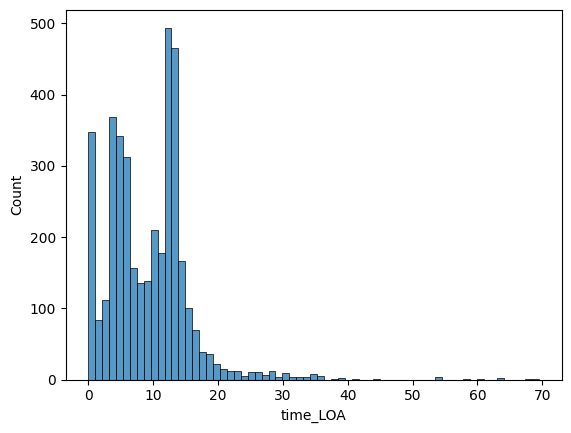

In [ ]:
sns.histplot(Target_Data['time_LOA'])

In [ ]:
Target_Data.query('time_LOA <= 3.0')

,SubjectID,time_LOA,Loss_of_autonomy
2,586.0,0.10,1
4,1064.0,0.00,1
5,1309.0,0.00,0
7,1835.0,0.00,0
8,2416.0,0.07,1
...,...,...,...
3902,997090.0,2.30,0
3903,997336.0,2.99,0
3905,998019.0,0.43,0
3907,998542.0,0.26,0


In [ ]:
print(len(Target_Data.query('time_LOA <= 3.0')['SubjectID'].tolist()), 'patients has time_LOA 3 month or less')

517 patients has time_LOA 3 month or less


In [ ]:
Target_Data_final = Target_Data.query('time_LOA > 3.0')

# minus 3months for target data value
Target_Data_final['time_LOA'] = Target_Data_final['time_LOA'] -3.0

Target_Data_final

<ipython-input-180-7988b039a57c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Target_Data_final['time_LOA'] = Target_Data_final['time_LOA'] -3.0


,SubjectID,time_LOA,Loss_of_autonomy
0,348.0,10.18,0
1,533.0,6.44,1
3,902.0,2.06,0
6,1736.0,5.02,1
10,3971.0,9.43,0
...,...,...,...
3906,998491.0,1.41,0
3909,999166.0,9.82,0
3910,999522.0,10.78,0
3911,999823.0,3.05,0


In [ ]:
print(len(Target_Data['SubjectID'])-len(Target_Data_final['SubjectID']), 'patients were excluded because of early occurrence or censoring')
print(len(Target_Data.query('(time_LOA <= 3.0) and (Loss_of_autonomy == 0)')), 'out of 388 are early censored (follow up being < 3mo)')
print(len(Target_Data.query('(time_LOA <= 3.0) and (Loss_of_autonomy == 1)')), 'out of 388 are early occured (occurred before 3mo)')

517 patients were excluded because of early occurrence or censoring
397 out of 388 are early censored (follow up being < 3mo)
120 out of 388 are early occured (occurred before 3mo)


In [ ]:
# Note that 'time_LOA' is month scaled

In [ ]:
Target_Data_Raw_form_time = Target_Data_final.copy()[['SubjectID', 'time_LOA']]
Target_Data_Raw_form_event = Target_Data_final.copy()[['SubjectID', 'Loss_of_autonomy']]

Target_Data_Raw_form_time['form_name'] = 'Target_variable'
Target_Data_Raw_form_time['feature_name'] = 'time_LOA'
Target_Data_Raw_form_time['feature_delta'] = np.nan
Target_Data_Raw_form_time = Target_Data_Raw_form_time.rename(columns = {'time_LOA': 'feature_value'})

Target_Data_Raw_form_time = Target_Data_Raw_form_time[['SubjectID', 'form_name', 'feature_name','feature_value', 'feature_delta']]
Target_Data_Raw_form_time

,SubjectID,form_name,feature_name,feature_value,feature_delta
0,348.0,Target_variable,time_LOA,10.18,NaN
1,533.0,Target_variable,time_LOA,6.44,NaN
3,902.0,Target_variable,time_LOA,2.06,NaN
6,1736.0,Target_variable,time_LOA,5.02,NaN
10,3971.0,Target_variable,time_LOA,9.43,NaN
...,...,...,...,...,...
3906,998491.0,Target_variable,time_LOA,1.41,NaN
3909,999166.0,Target_variable,time_LOA,9.82,NaN
3910,999522.0,Target_variable,time_LOA,10.78,NaN
3911,999823.0,Target_variable,time_LOA,3.05,NaN


In [ ]:
Target_Data_Raw_form_event['form_name'] = 'Target_variable'
Target_Data_Raw_form_event['feature_name'] = 'status_LOA'
Target_Data_Raw_form_event['feature_delta'] = np.nan
Target_Data_Raw_form_event = Target_Data_Raw_form_event.rename(columns = {'Loss_of_autonomy': 'feature_value'})

Target_Data_Raw_form_event = Target_Data_Raw_form_event[['SubjectID', 'form_name', 'feature_name','feature_value', 'feature_delta']]
Target_Data_Raw_form_event

,SubjectID,form_name,feature_name,feature_value,feature_delta
0,348.0,Target_variable,status_LOA,0,NaN
1,533.0,Target_variable,status_LOA,1,NaN
3,902.0,Target_variable,status_LOA,0,NaN
6,1736.0,Target_variable,status_LOA,1,NaN
10,3971.0,Target_variable,status_LOA,0,NaN
...,...,...,...,...,...
3906,998491.0,Target_variable,status_LOA,0,NaN
3909,999166.0,Target_variable,status_LOA,0,NaN
3910,999522.0,Target_variable,status_LOA,0,NaN
3911,999823.0,Target_variable,status_LOA,0,NaN


In [ ]:
Target_Data_Raw_form = pd.concat([Target_Data_Raw_form_time, Target_Data_Raw_form_event]).sort_values(by=['SubjectID', 'form_name', 'feature_name'] ,ascending=True)
Target_Data_Raw_form

,SubjectID,form_name,feature_name,feature_value,feature_delta
0,348.0,Target_variable,status_LOA,0.00,NaN
0,348.0,Target_variable,time_LOA,10.18,NaN
1,533.0,Target_variable,status_LOA,1.00,NaN
1,533.0,Target_variable,time_LOA,6.44,NaN
3,902.0,Target_variable,status_LOA,0.00,NaN
...,...,...,...,...,...
3910,999522.0,Target_variable,time_LOA,10.78,NaN
3911,999823.0,Target_variable,status_LOA,0.00,NaN
3911,999823.0,Target_variable,time_LOA,3.05,NaN
3912,999990.0,Target_variable,status_LOA,0.00,NaN


In [ ]:
Target_data_subject_list = Target_Data_Raw_form['SubjectID'].unique().tolist()

In [ ]:
Filtered_4_target_data_not_added = Filtered_3.query("SubjectID == {0}".format(Target_data_subject_list))
Filtered_4 = pd.concat([Filtered_4_target_data_not_added, Target_Data_Raw_form])
Filtered_4

,SubjectID,form_name,feature_name,feature_value,feature_delta
2,348.0,Demographic,Gender,F,0.0
5,533.0,Demographic,Gender,F,0.0
9,902.0,Demographic,Gender,F,0.0
17,1736.0,Demographic,Gender,M,0.0
43,3971.0,Demographic,Gender,F,0.0
...,...,...,...,...,...
3910,999522.0,Target_variable,time_LOA,10.78,NaN
3911,999823.0,Target_variable,status_LOA,0.0,NaN
3911,999823.0,Target_variable,time_LOA,3.05,NaN
3912,999990.0,Target_variable,status_LOA,0.0,NaN


In [ ]:
print("Filtered_4 data contains", len(Filtered_4['SubjectID'].unique().tolist()), " patients")

Filtered_4 data contains 3396  patients


Save as

In [ ]:
Filtered_4.to_csv('/content/drive/MyDrive/Predicting Loss of Autonomy/1. Swallowing/Jul 2022 PRO-ACT data (latest update)/Files/PRO-ACT_filtered.csv')